# Classification Task with Multilayer Perceptron

Here is a neural network model that predicts the presence of breast cancer in a patient or not. The data that is used to build this model is the Wisconsin Breast Cancer Data Set.

The target variable in the dataset is the **benign_0__mal_1** column which has 0 for benign and 1 for malign.

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#reading in the file
df = pd.read_csv('cancer_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

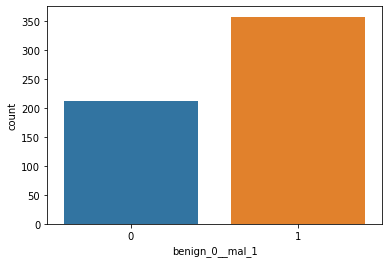

In [8]:
#checking how many benign and malign patients are present in the dataset
sns.countplot(x='benign_0__mal_1',data=df);

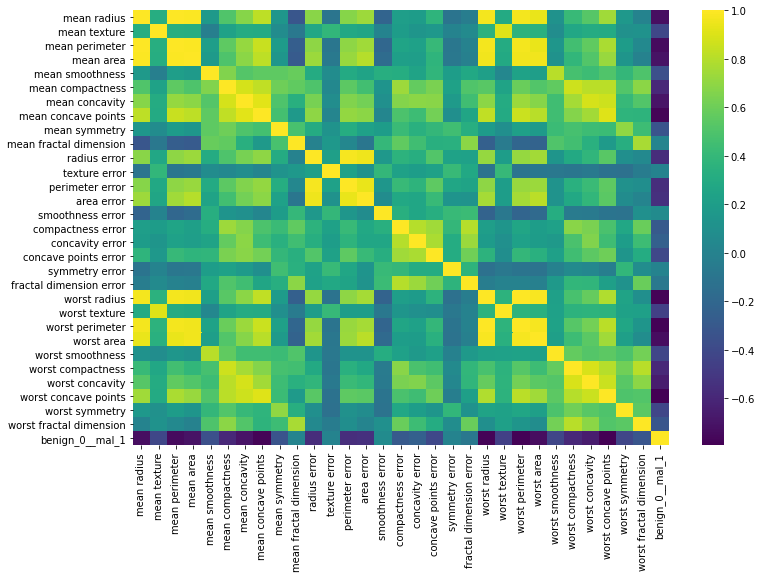

In [10]:
# checking for correlation between different features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'viridis');

In [11]:
# checking correlation with respect to the target variable
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

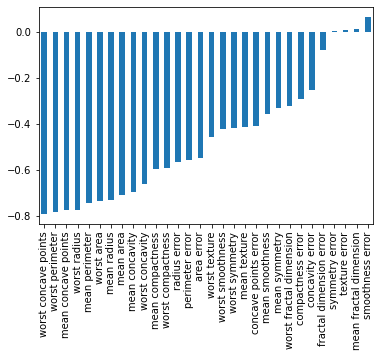

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

## Train Test Split

In [14]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)


## Scaling Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [65]:
model = Sequential()

# Input Layer - the weights that have been initialized is He iniatialization with a normal distribution. The parameter
# kernel_initializer specifies it.
model.add(Dense(units=30,activation='relu', kernel_initializer = "he_normal")) 
model.add(Dropout(0.5)) # adding dropout layers to avoid overfitting

# Hidden Layer
# Here also, He iniatialization with a normal distribution are the weights initialized
model.add(Dense(units=15,activation='relu', kernel_initializer = "he_normal"))
model.add(Dropout(0.5))

# Since it is a binary classification task, the sigmoid activation function has been used
# Output Layer
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

Adding Earlystopping while training makes sure the training stops when the validation loss that is being monitored increases. Thus, this also avoids overfitting.

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [68]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
13/13 [==============================] - 0s 16ms/step - loss: 0.7856 - accuracy: 0.5452 - val_loss: 0.7164 - val_accuracy: 0.5614
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.7274 - accuracy: 0.5779 - val_loss: 0.6751 - val_accuracy: 0.6959
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5930 - val_loss: 0.6457 - val_accuracy: 0.8070
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.6181 - val_loss: 0.6180 - val_accuracy: 0.8538
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.6080 - val_loss: 0.5893 - val_accuracy: 0.8480
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.6683 - val_loss: 0.5599 - val_accuracy: 0.8772
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.7010 - val_loss: 0.5322 - val_accuracy: 0.8889
Epoch 8/600


Epoch 59/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.9347 - val_loss: 0.1311 - val_accuracy: 0.9649
Epoch 60/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.9271 - val_loss: 0.1310 - val_accuracy: 0.9649
Epoch 61/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1570 - accuracy: 0.9573 - val_loss: 0.1299 - val_accuracy: 0.9649
Epoch 62/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1916 - accuracy: 0.9322 - val_loss: 0.1292 - val_accuracy: 0.9591
Epoch 63/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9548 - val_loss: 0.1294 - val_accuracy: 0.9591
Epoch 64/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.9472 - val_loss: 0.1258 - val_accuracy: 0.9591
Epoch 65/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.9447 - val_loss: 0.1243 - val_accuracy: 0.9649
Epoch 

13/13 [==============================] - 0s 4ms/step - loss: 0.1059 - accuracy: 0.9573 - val_loss: 0.1231 - val_accuracy: 0.9649
Epoch 117/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1086 - accuracy: 0.9523 - val_loss: 0.1169 - val_accuracy: 0.9708
Epoch 118/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9598 - val_loss: 0.1176 - val_accuracy: 0.9766
Epoch 119/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1055 - accuracy: 0.9698 - val_loss: 0.1106 - val_accuracy: 0.9649
Epoch 120/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0975 - accuracy: 0.9724 - val_loss: 0.1126 - val_accuracy: 0.9649
Epoch 121/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9799 - val_loss: 0.1140 - val_accuracy: 0.9708
Epoch 122/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9749 - val_loss: 0.1147 - val_accuracy: 0.9708
Epoch 123/600

In [69]:
model_loss = pd.DataFrame(model.history.history)

In [70]:
model_loss

,loss,accuracy,val_loss,val_accuracy
0,0.785624,0.545226,0.716417,0.561404
1,0.727387,0.577889,0.675077,0.695906
2,0.692651,0.592965,0.645700,0.807018
3,0.662028,0.618090,0.618024,0.853801
4,0.671516,0.608040,0.589259,0.847953
...,...,...,...,...
139,0.078401,0.974874,0.117553,0.964912
140,0.086104,0.967337,0.114466,0.970760
141,0.076195,0.979900,0.113026,0.970760
142,0.063757,0.982412,0.112820,0.970760


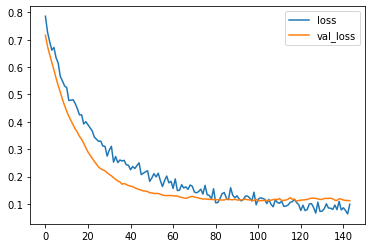

In [71]:
# Plot of training loss Vs validation loss
model_loss[['loss', 'val_loss']].plot()

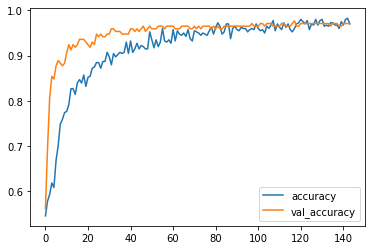

In [72]:
# Plot for training accuracy Vs validation accuracy
model_loss[['accuracy','val_accuracy']].plot();

# Model Evaluation

In [73]:
predictions = model.predict_classes(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [76]:
print(confusion_matrix(y_test,predictions))

[[ 63   3]
 [  2 103]]


The F1 score is 0.96 and 0.98 respectively which means that the model classifies most of the values properly and there are very few False Positives and False Negatives which can be seen in the confusion matrix as well.